In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
# Load data
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [6]:
# Create the new column to label the fake and real news
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
# Remove last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
df_fake.drop(df_fake_manual_testing.index, inplace=True)


df_true_manual_testing = df_true.tail(10)
df_true.drop(df_true_manual_testing.index, inplace=True)

In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [10]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/var/folders/2z/9mppbxqj7vgfrxlt416vn4zc0000gn/T/ipykernel_92067/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/var/folders/2z/9mppbxqj7vgfrxlt416vn4zc0000gn/T/ipykernel_92067/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [11]:
df_fake_manual_testing.head(5)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [12]:
df_true_manual_testing.head(5)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO () - Cesar Mata Pires, the owner and...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA () - North Korea and the United States ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA () - North Korea and the United States ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN () - Danish police said on Tuesday ...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS () - Two North Korean shipments...,worldnews,"August 21, 2017",1


In [13]:
# Merge True and Fake manual testing df
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [14]:
# Merge True and Fake Dataframes
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
# Remove unnecessarily columns
df = df_merge.drop(["title", "subject", "date"], axis = 1)
df.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
# Randomly mix the data
df = df.sample(frac = 1)

In [18]:
df.head()

,text,class
6554,Donald Trump s campaign has prided itself on l...,0
13,The following statements were posted to the ve...,1
15705,,0
6989,It s no secret Republican women hate Donald Tr...,0
21048,MOSCOW () - Russian President Vladimir Putin i...,1


In [19]:
# Reset the index
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns

Index(['text', 'class'], dtype='object')

In [21]:
df.head()

,text,class
0,Donald Trump s campaign has prided itself on l...,0
1,The following statements were posted to the ve...,1
2,,0
3,It s no secret Republican women hate Donald Tr...,0
4,MOSCOW () - Russian President Vladimir Putin i...,1


In [22]:
# Create a function to process the texts
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub('[()]','',text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [23]:
df["text"] = df["text"].apply(wordopt)

In [24]:
# Split data into train and test data
X = df["text"]
Y = df["class"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [26]:
# Conver text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# Prediction
pred_lr = LR.predict(xv_test)

In [29]:
LR.score(xv_test, y_test)

0.9805035650623886

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4668
           1       0.98      0.98      0.98      4308

    accuracy                           0.98      8976
   macro avg       0.98      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976



In [31]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
pred_dt = DT.predict(xv_test)

In [33]:
DT.score(xv_test, y_test)

0.9523172905525846

In [34]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4668
           1       0.97      0.93      0.95      4308

    accuracy                           0.95      8976
   macro avg       0.95      0.95      0.95      8976
weighted avg       0.95      0.95      0.95      8976



In [35]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [36]:
pred_gbc = GBC.predict(xv_test)

In [37]:
GBC.score(xv_test, y_test)

0.9692513368983957

In [38]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4668
           1       0.96      0.97      0.97      4308

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976



In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 0)
RFC.fit(xv_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
pred_rfc = RFC.predict(xv_test)

In [41]:
RFC.score(xv_test, y_test)

0.9812834224598931

In [42]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4668
           1       0.98      0.98      0.98      4308

    accuracy                           0.98      8976
   macro avg       0.98      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976



In [43]:
# Model Testing
def output_label(n):
    if n == 0:
        return "Fake News"
    else:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text" :[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(pred_LR[0]),                                                                                                       
                                                                                                              output_label(pred_DT[0]), 
                                                                                                              output_label(pred_GBC[0]), 
                                                                                                              output_label(pred_RFC[0])))

In [44]:
news = str(input())
manual_testing(news)

 BRUSSELS - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Tru



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [45]:
news = str(input())
manual_testing(news)

 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [46]:
news = str(input())
manual_testing(news)

 SAO PAULO - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady g



LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


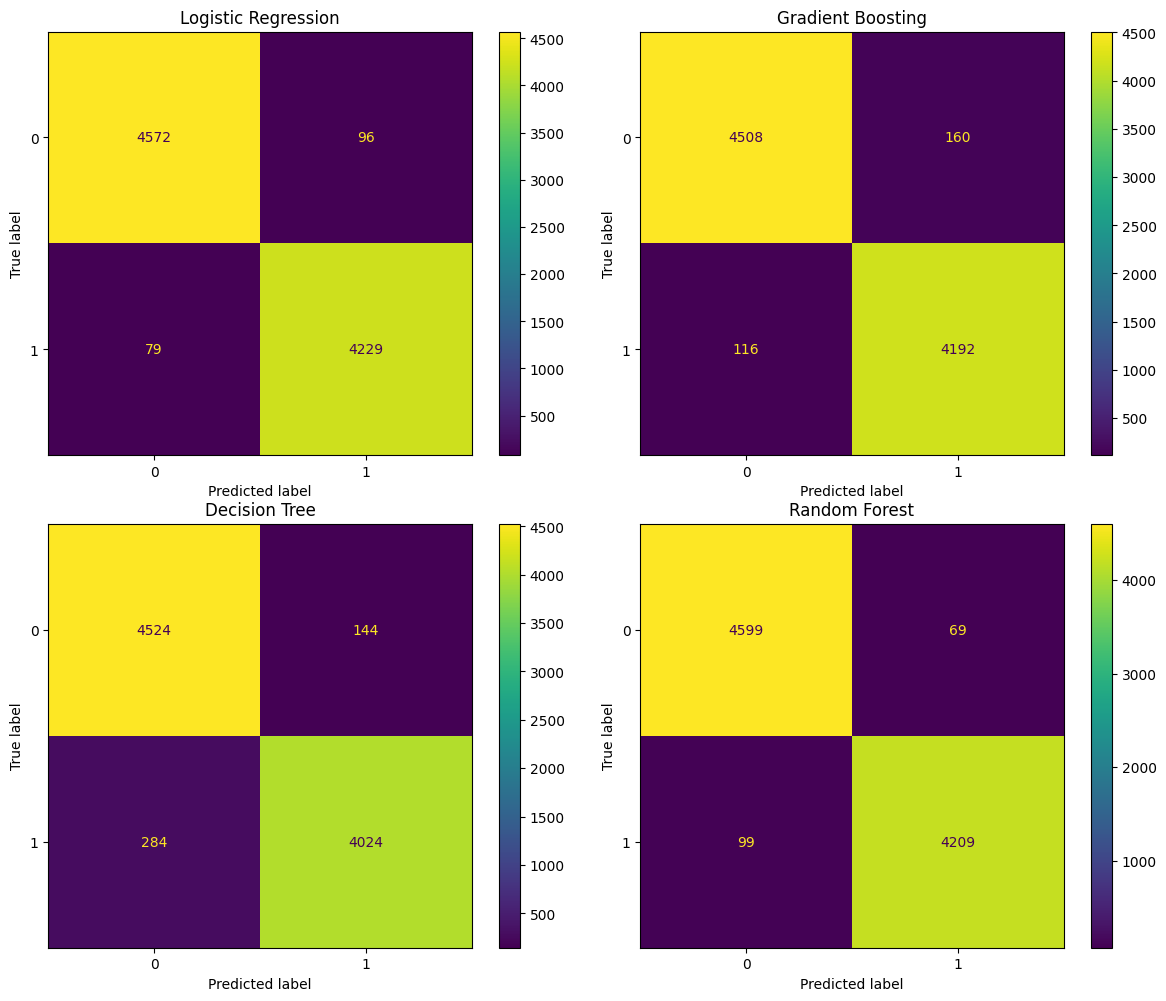

In [47]:
# Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# LR
cm_lr = confusion_matrix(y_test, pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[0,0])
axes[0,0].set_title('Logistic Regression')

# GBC
cm_gbc = confusion_matrix(y_test, pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp_gbc.plot(ax=axes[0,1])
axes[0,1].set_title('Gradient Boosting')

# DT
cm_dt = confusion_matrix(y_test, pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(ax=axes[1,0])
axes[1,0].set_title('Decision Tree')

# RFD
cm_rfd = confusion_matrix(y_test, pred_rfc)
disp_rfd = ConfusionMatrixDisplay(confusion_matrix=cm_rfd)
disp_rfd.plot(ax=axes[1,1])
axes[1,1].set_title('Random Forest')

plt.tight_layout()
plt.show()
